In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
#from gmr_ import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval


save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

***

In [5]:
fits_path = "../data/cubes/Orion.methanol.cbc.contsub.image.fits"
data,wcs,hdu,freq = load_data(fits_path)
#data,wcs,hdu = load_data(fits_path)

print(wcs)
print("\nShape of array:", data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.80979166667  -5.376388888889  229763161321.4  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41

Shape of array: (41, 100, 100)


In [6]:
freq

array([229.74362788, 229.74411621, 229.74460455, 229.74509288,
       229.74558122, 229.74606956, 229.74655789, 229.74704623,
       229.74753457, 229.7480229 , 229.74851124, 229.74899957,
       229.74948791, 229.74997625, 229.75046458, 229.75095292,
       229.75144125, 229.75192959, 229.75241793, 229.75290626,
       229.7533946 , 229.75388294, 229.75437127, 229.75485961,
       229.75534794, 229.75583628, 229.75632462, 229.75681295,
       229.75730129, 229.75778962, 229.75827796, 229.7587663 ,
       229.75925463, 229.75974297, 229.7602313 , 229.76071964,
       229.76120798, 229.76169631, 229.76218465, 229.76267299,
       229.76316132])

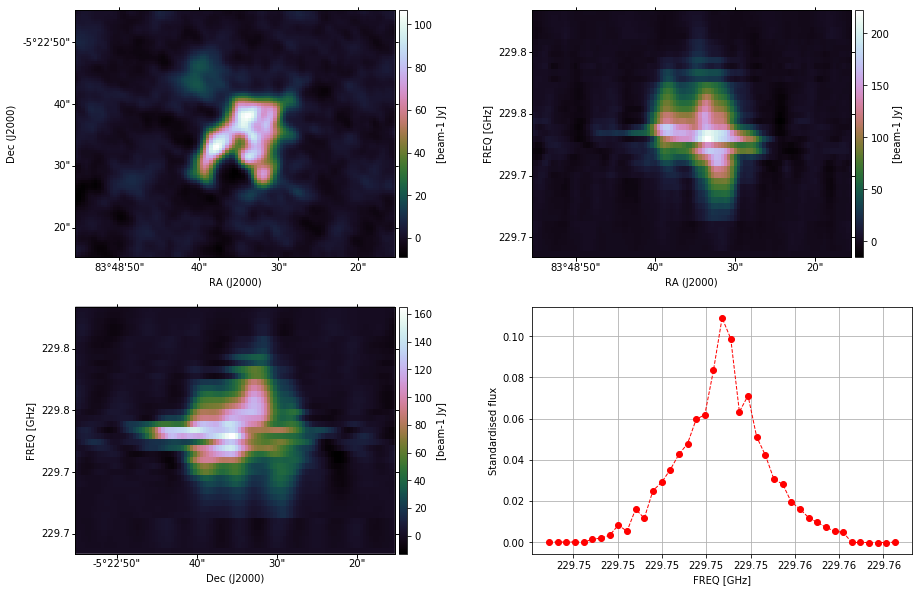

In [17]:
cube_plot(data, wcs=wcs, freq=freq, unit=hdu.header["BUNIT"])

In [6]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, freq=freq, back_level=rms, wcs=wcs, verbose=False, n_center=500)

[INFO] Number of usable pixels: 17411
(17411, 376)
(1000, 73)
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


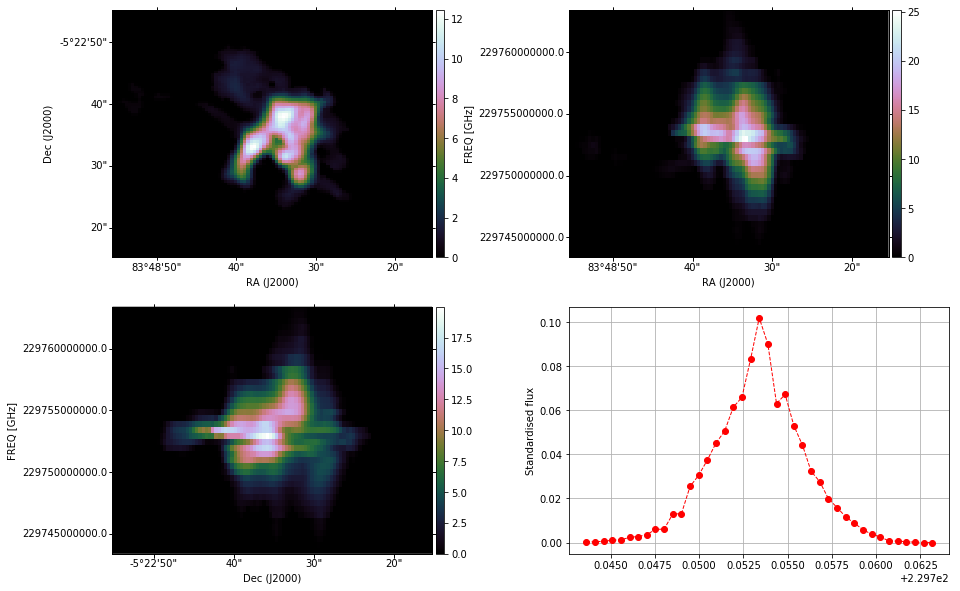

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


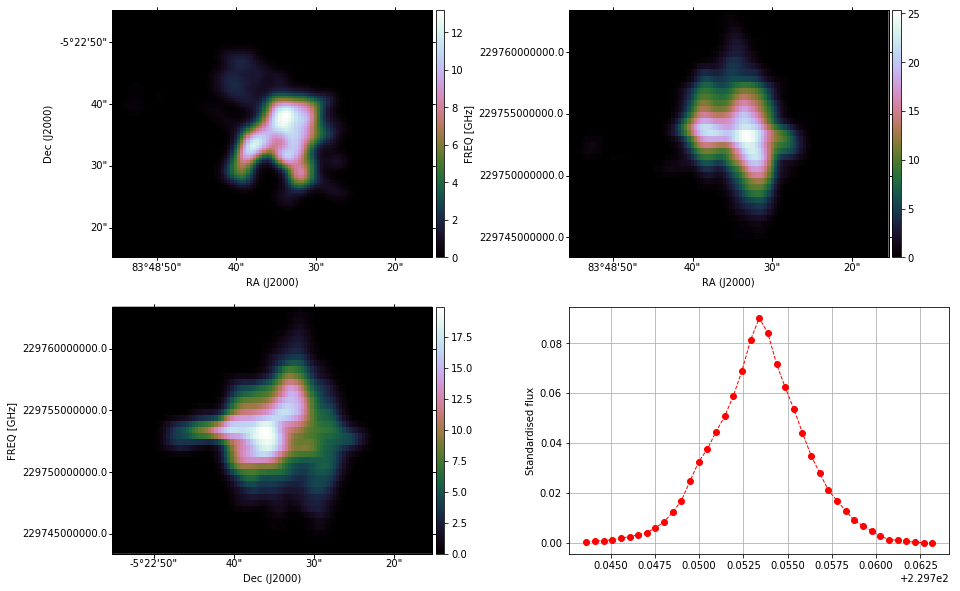

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


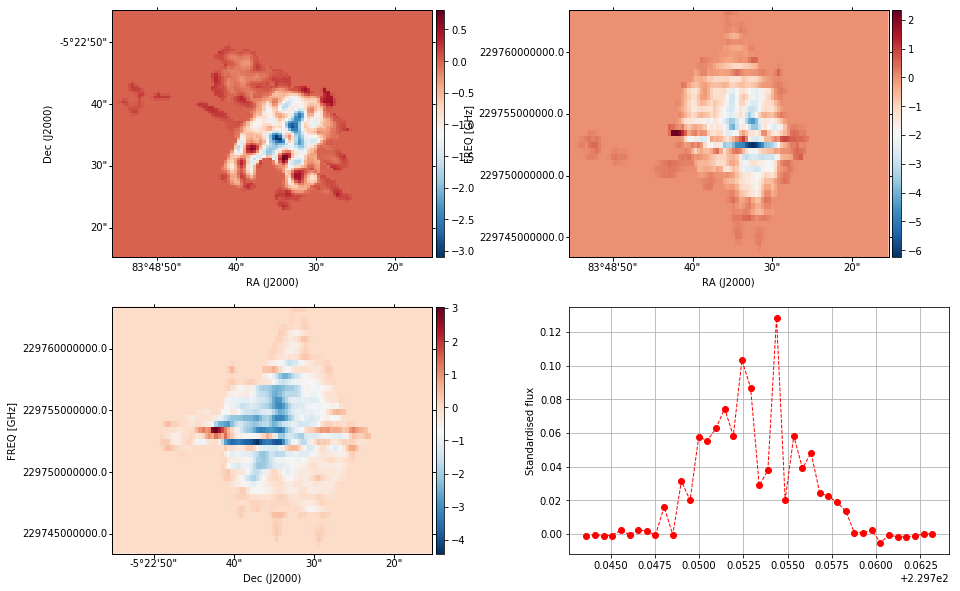

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.0167347762031843
Inf norm of residual: 0.36317346975909026
Variance of residual: 0.00027746310399513405
Normalized flux addition: 0.1566647301067019
Normalized flux lost: 0.039191363010482864


In [7]:
hdmc.get_residual_stats();

## Profiling Results

In [8]:
# with k_sig=2
print(open('gmr_v0_prof', 'r').read())

         112058198 function calls (112024132 primitive calls) in 110.408 seconds

   Ordered by: internal time
   List reduced from 1568 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16911   26.825    0.002   26.825    0.002 gmr.py:283(update_structs)
        2   15.646    7.823   57.496   28.748 utils.py:185(compute_neighbors)
   274231   14.219    0.000   14.219    0.000 {built-in method numpy.core.multiarray.array}
   411002   11.981    0.000   11.981    0.000 {method 'sort' of 'list' objects}
106986102    7.868    0.000    7.868    0.000 {method 'append' of 'list' objects}
    16911    7.139    0.000    7.139    0.000 gmr.py:231(less_dissimilar)
    16915    5.989    0.000    6.861    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   411000    4.640    0.000    4.640    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        2    2.221    1.110    2.221    1.110 gmr.py:198(build_diss_

In [5]:
print(open('gmr_v0_prof', 'r').read())

         112058238 function calls (112024172 primitive calls) in 117.482 seconds

   Ordered by: internal time
   List reduced from 1568 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16911   30.967    0.002   30.967    0.002 gmr.py:283(update_structs)
        2   16.142    8.071   57.432   28.716 utils.py:185(compute_neighbors)
   274231   13.707    0.000   13.707    0.000 {built-in method numpy.core.multiarray.array}
   411002   12.550    0.000   12.550    0.000 {method 'sort' of 'list' objects}
106986102    8.189    0.000    8.189    0.000 {method 'append' of 'list' objects}
    16911    7.816    0.000    7.816    0.000 gmr.py:231(less_dissimilar)
    16915    5.730    0.000    6.729    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   411000    4.388    0.000    4.388    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        2    2.464    1.232    2.464    1.232 gmr.py:198(build_diss_

In [5]:
print(open('gmr_v0_prof', 'r').read())

         112057870 function calls (112023816 primitive calls) in 193.956 seconds

   Ordered by: internal time
   List reduced from 1569 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16911   91.625    0.005   91.625    0.005 gmr.py:211(less_dissimilar)
    16911   23.444    0.001   23.444    0.001 gmr.py:262(update_structs)
        2   16.591    8.295   58.797   29.398 utils.py:185(compute_neighbors)
   274231   14.189    0.000   14.189    0.000 {built-in method numpy.core.multiarray.array}
   411002   12.466    0.000   12.466    0.000 {method 'sort' of 'list' objects}
106986102    8.071    0.000    8.071    0.000 {method 'append' of 'list' objects}
    16915    5.567    0.000    6.426    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   411000    4.811    0.000    4.811    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        1    2.386    2.386  193.978  193.978 hdmclouds_v1.py:54(__i

In [9]:
print(open('gmr_v0_prof', 'r').read())

         112058184 function calls (112024114 primitive calls) in 221.882 seconds

   Ordered by: internal time
   List reduced from 1566 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16911   98.615    0.006   98.615    0.006 gmr.py:211(less_dissimilar)
    16911   42.688    0.003   42.688    0.003 gmr.py:262(update_structs)
        2   16.932    8.466   59.186   29.593 utils.py:185(compute_neighbors)
   274231   14.123    0.000   14.123    0.000 {built-in method numpy.core.multiarray.array}
   411002   12.666    0.000   12.666    0.000 {method 'sort' of 'list' objects}
106986130    8.322    0.000    8.322    0.000 {method 'append' of 'list' objects}
    16915    5.675    0.000    6.678    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   411000    4.667    0.000    4.667    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        2    3.015    1.508    3.015    1.508 gmr.py:198(build_diss_

In [14]:
print(open('gmr_v0_prof', 'r').read())

         72995042 function calls (72960640 primitive calls) in 1058.946 seconds

   Ordered by: internal time
   List reduced from 1566 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    17192  708.139    0.041  708.139    0.041 gmr.py:211(less_dissimilar)
    17192  173.784    0.010  173.784    0.010 gmr.py:262(update_structs)
        1   80.878   80.878   80.878   80.878 {fgm_eval.gm_eval3d_1}
        2   22.462   11.231   22.462   11.231 gmr.py:198(build_diss_matrix)
      6/2    9.953    1.659   12.012    6.006 gmr.py:177(_compute_neighbors)
        2    9.396    4.698   27.927   13.963 utils.py:175(compute_neighbors)
    17196    7.817    0.000    8.872    0.001 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   276627    6.220    0.000    6.220    0.000 {built-in method numpy.core.multiarray.array}
   410402    5.861    0.000    5.861    0.000 {method 'sort' of 'list' objects}
        2    4.866  

In [7]:
# this is the result for gmr_ module: The one that keeps the dissimilarity array sorted
print(open('gmr_v0_prof', 'r').read())

         72994532 function calls (72960130 primitive calls) in 6384.163 seconds

   Ordered by: internal time
   List reduced from 1567 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    17192 3319.574    0.193 3319.574    0.193 gmr.py:211(less_dissimilar)
    34396 2744.918    0.080 2745.433    0.080 {method 'sum' of 'numpy.ndarray' objects}
    17192  162.305    0.009  162.305    0.009 gmr.py:262(update_structs)
        1   68.710   68.710   68.710   68.710 {fgm_eval.gm_eval3d_1}
        2   20.136   10.068   20.136   10.068 gmr.py:198(build_diss_matrix)
        2    9.179    4.589   26.920   13.460 utils.py:175(compute_neighbors)
      6/2    8.584    1.431   10.321    5.161 gmr.py:177(_compute_neighbors)
    17196    7.638    0.000    8.552    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   410402    5.779    0.000    5.779    0.000 {method 'sort' of 'list' objects}
   276627    5.463    0.

In [60]:
# this is the result for the gmr_ module (no sorted klarray) without any optimization
print(open('gmr_v0_prof', 'r').read())

         73037988 function calls (72971288 primitive calls) in 4189.365 seconds

   Ordered by: internal time
   List reduced from 1889 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    17192 3574.077    0.208 3574.077    0.208 gmr.py:323(update_structs)
    17192  388.048    0.023  388.048    0.023 gmr.py:264(least_dissimilar)
        1   76.208   76.208   76.208   76.208 {fgm_eval.gm_eval3d_1}
        2   59.987   29.993   59.987   29.993 gmr.py:251(build_diss_matrix)
      6/2   20.140    3.357   21.754   10.877 gmr.py:229(_compute_neighbors)
    17196   11.610    0.001   12.574    0.001 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
        2   11.230    5.615 4084.614 2042.307 gmr.py:369(mixture_reduction)
        2    9.366    4.683   28.084   14.042 utils.py:175(compute_neighbors)
   410408    6.096    0.000    6.096    0.000 {method 'sort' of 'list' objects}
   242237    5.728    0.000    5.72

## GM parameters optimization

In [9]:
%%prun -s tottime -q -l 30 -T gma_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'gma_prof'. 


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


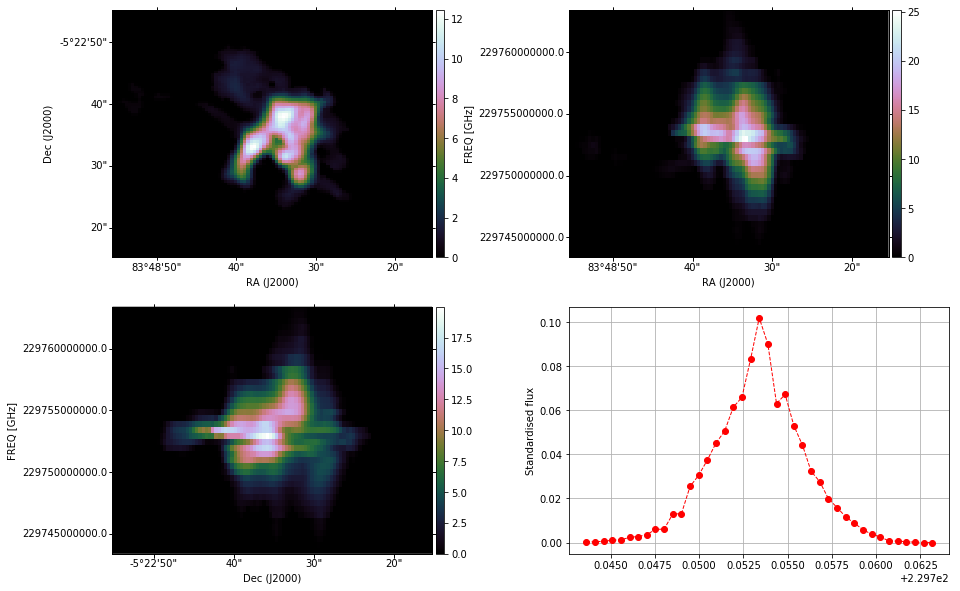

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


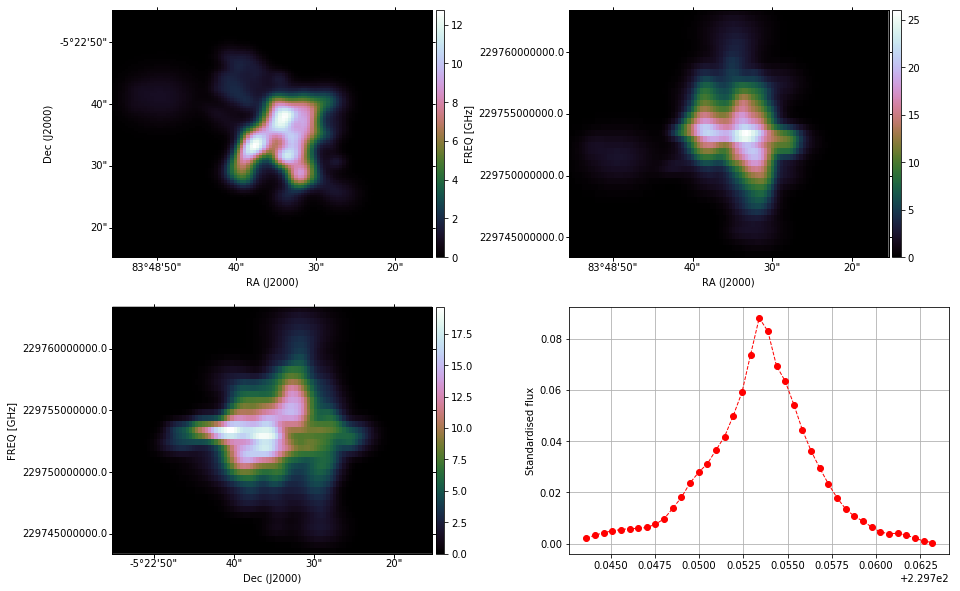

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


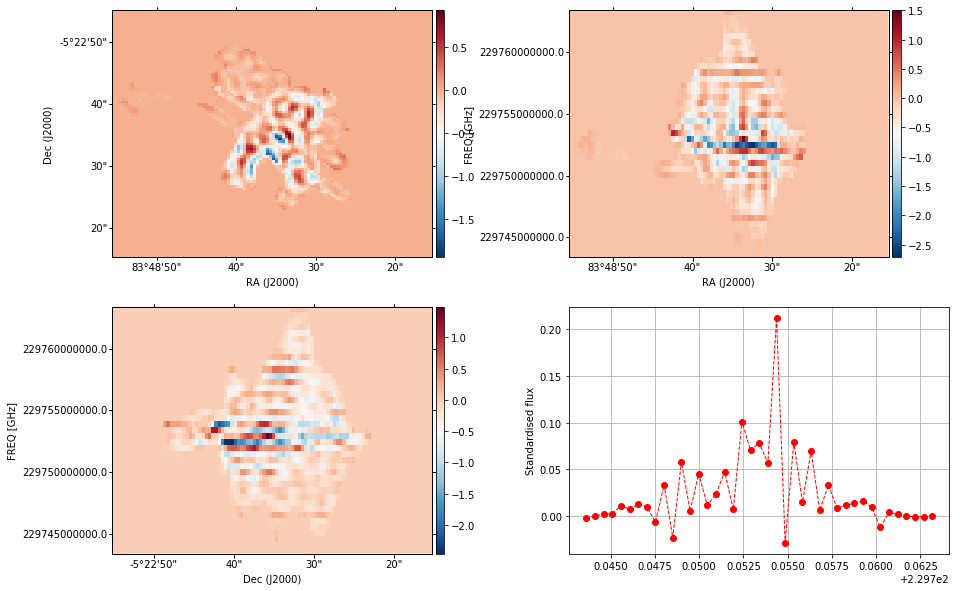

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.010467665229382797
Inf norm of residual: 0.3833021027141742
Variance of residual: 0.00010930379940418073
Normalized flux addition: 0.07730594807275015
Normalized flux lost: 0.039499766974979166


In [10]:
hdmc.get_residual_stats(plot=True);

In [11]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200200.
nfev: 200229
xtol: 1e-07
ftol: 1e-07


In [12]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 1128.6133489608765


In [13]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.30095392551722966
sig variation:  0.07170741574621037


In [15]:
print(open('gma_prof', 'r').read())

         13820548 function calls (13818336 primitive calls) in 1128.614 seconds

   Ordered by: internal time
   List reduced from 135 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   200231  854.894    0.004  854.894    0.004 {fgm_eval.gm_eval3d_2}
        1  211.282  211.282 1128.584 1128.584 {built-in method scipy.optimize._minpack._lmdif}
   600693   17.685    0.000   33.296    0.000 necompiler.py:751(evaluate)
   200231   14.731    0.000   22.906    0.000 hdmclouds_v1.py:34(d1psi1)
   200231    7.507    0.000    7.507    0.000 utils.py:149(sig_mapping)
   200231    6.169    0.000  917.330    0.005 hdmclouds_v1.py:435(F)
   600696    4.323    0.000    5.421    0.000 necompiler.py:535(getContext)
   600693    3.589    0.000    5.884    0.000 necompiler.py:726(getArguments)
   600696    1.505    0.000    1.505    0.000 {built-in method builtins.sorted}
  1201396    1.370    0.000    1.370    0.000 {built-in method numpy.core.mu

***
***

## Again with bigger number of centers: `750`

In [11]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, bak_level=rms, wcs=wcs, verbose=False, n_center=750)

[INFO] Number of usable pixels: 17411
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


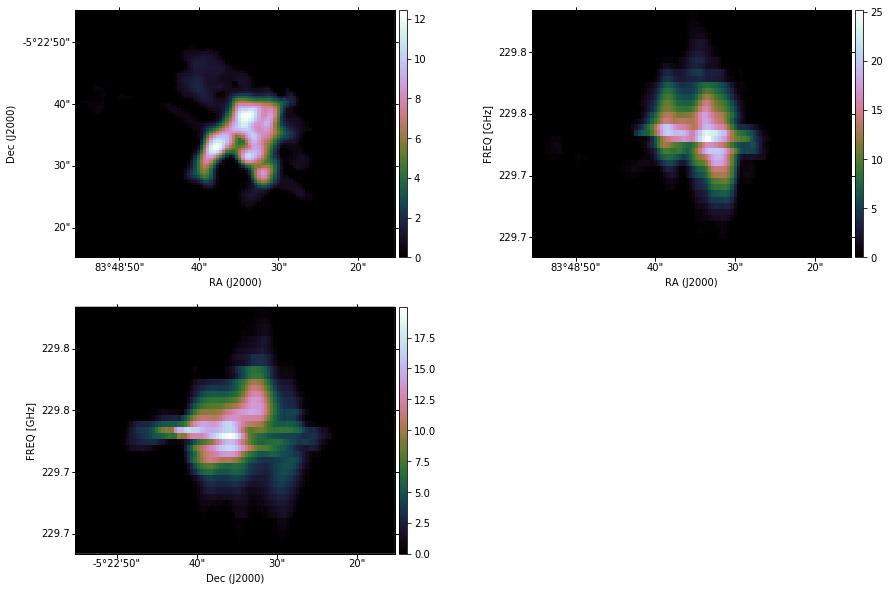

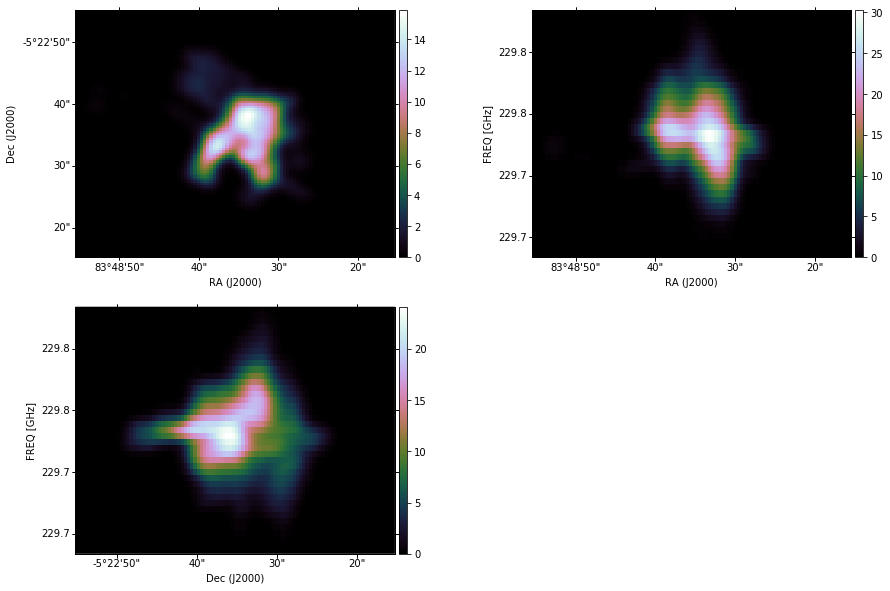

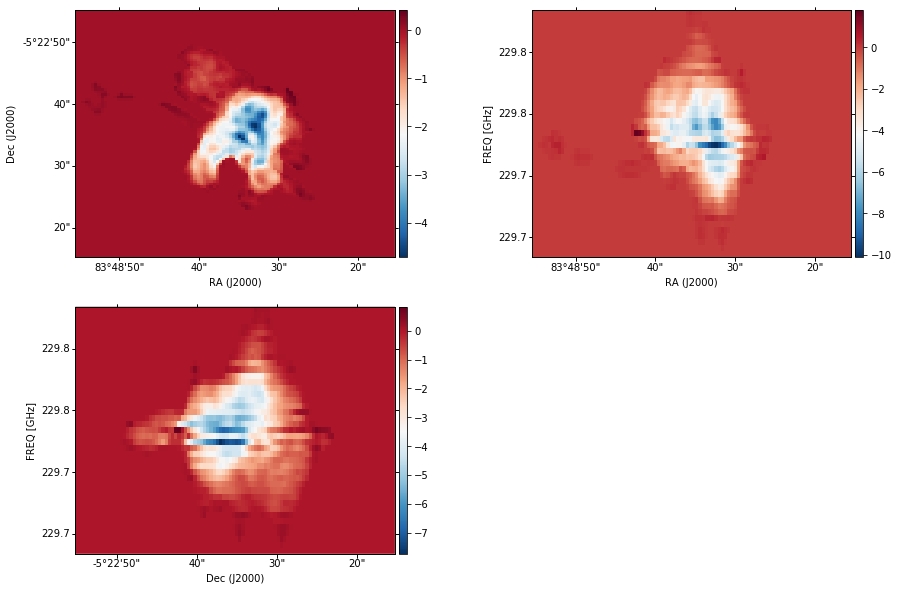

RESIDUAL STATS
RMS of residual: 0.027567495941751997
Inf norm of residual: 0.47003436221792994
Variance of residual: 0.0007416502978021524
Normalized flux addition: 0.3279445943058544
Normalized flux lost: 0.015522192790487518


In [12]:
hdmc.get_residual_stats();

***

In [13]:
hdmc.build_gmr()

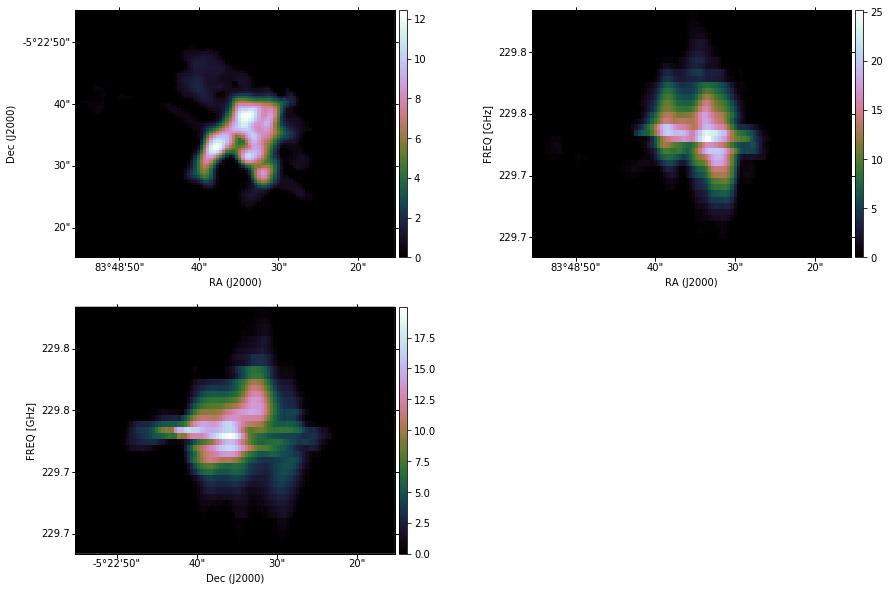

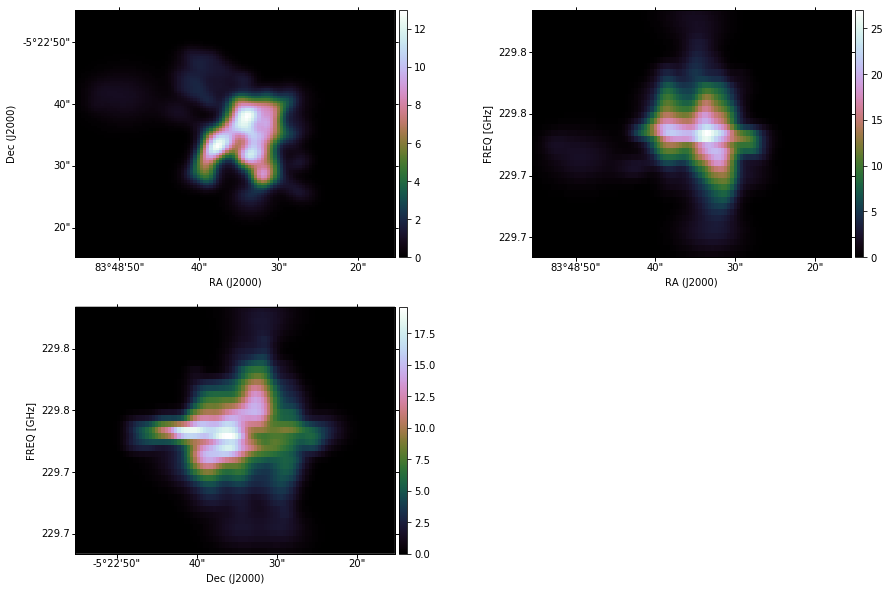

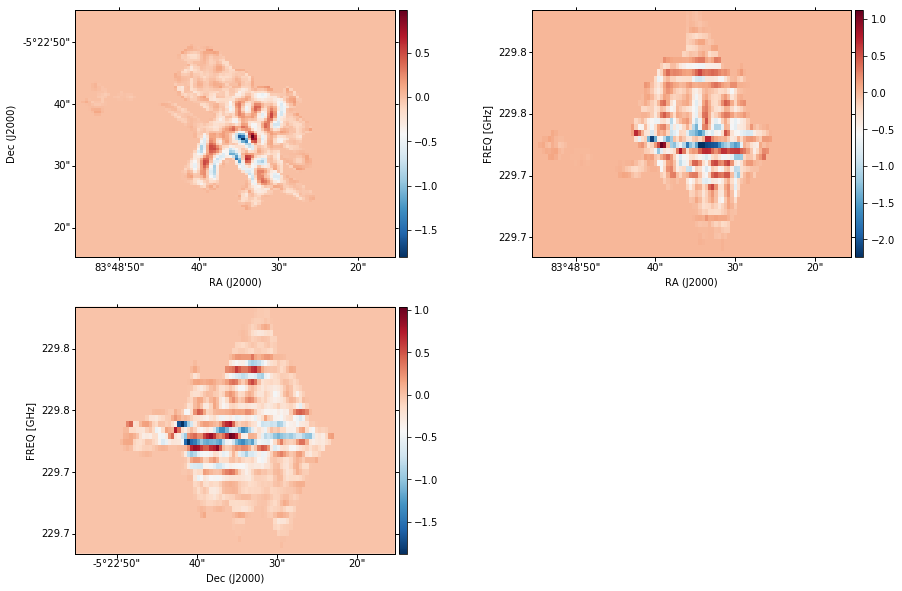

RESIDUAL STATS
RMS of residual: 0.008636562198282679
Inf norm of residual: 0.2564620791689578
Variance of residual: 7.445141911669721e-05
Normalized flux addition: 0.06149108124026307
Normalized flux lost: 0.034295667667530394


In [14]:
hdmc.get_residual_stats(plot=True);

In [15]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 300200.
nfev: 300232
xtol: 1e-07
ftol: 1e-07


In [16]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 4004.462811231613


In [17]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.2962359355920815
sig variation:  0.06905267360801996


***

In [ ]:
dd